In [83]:
import pandas as pd
import plotly.express as px
from sklearn.preprocessing import *
import numpy as np
import os
from functools import reduce
import datetime
import seaborn as sns

In [76]:
df = pd.read_csv("All.csv",parse_dates=["Data"],index_col ="Data").sort_values(by="Data").drop(columns="Unnamed: 0")

In [77]:
df

,Day_of_Week,Location,Month_Name,O3,Pr,RH,T,VOC,index,NO2,PM10-h,PM2.5-h
Data,,,,,,,,,,,,
2022-05-31 22:00:00,Tuesday,ARGINONE,May,26.1,1013.9,75.0,22.5,82.4213,36573,0.0,12.7,12.7
2022-05-31 22:00:00,Tuesday,VILLAFULVIA,May,45.7,1014.0,79.2,21.7,243.0839,75687,0.0,11.4,11.4
2022-05-31 22:00:00,Tuesday,PONTELAGOSCURO,May,36.7,1014.2,72.9,22.3,375.1964,91358,0.0,10.9,10.9
2022-05-31 22:00:00,Tuesday,CUSFERRARA,May,43.4,1014.1,81.4,21.1,319.9190,84317,29.8,0.0,0.0
2022-05-31 22:00:00,Tuesday,CORSOISONZO,May,60.3,1014.5,75.0,23.2,734.4674,44401,0.0,12.7,12.6
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-23 21:00:00,Friday,POROTTO,September,67.4,1018.0,45.5,19.0,291.2307,7978,19.3,3.7,3.7
2022-09-23 21:00:00,Friday,BARCO,September,52.7,1017.8,54.0,17.7,254.6759,7953,11.6,3.3,3.3
2022-09-23 21:00:00,Friday,MODENA,September,43.4,1018.7,45.3,19.6,401.9515,23280,12.9,3.1,3.1


<AxesSubplot:>

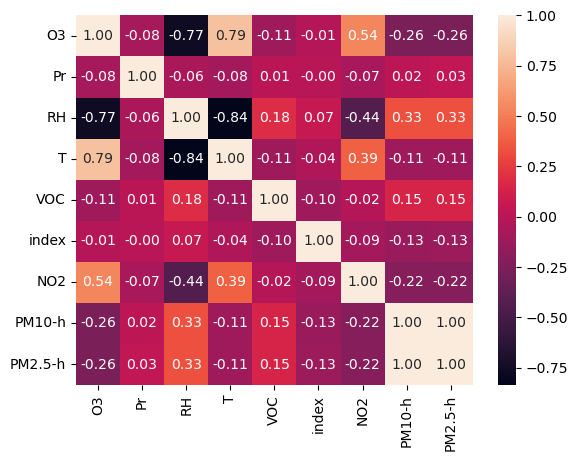

In [86]:
sns.heatmap(df.corr(),annot=True,fmt=".2f")

In [110]:
goruped = df.groupby("Day_of_Week").describe()
goruped

O3                                                           \
              count       mean        std  min    25%    50%      75%    max   
Day_of_Week                                                                    
Friday       4853.0  82.794910  53.267044  0.0  38.90  75.00  122.200  251.4   
Monday       4605.0  89.850684  52.731216  0.0  45.40  84.90  131.900  231.3   
Saturday     4599.0  88.803849  51.494527  0.0  46.70  83.30  128.500  254.8   
Sunday       4604.0  91.662880  50.753163  0.0  50.50  87.65  131.800  248.8   
Thursday     4889.0  81.269933  49.772843  0.0  39.60  72.40  122.200  229.0   
Tuesday      4624.0  84.873702  49.103377  0.0  44.45  79.00  124.025  220.6   
Wednesday    4888.0  82.424079  48.523748  0.0  41.40  79.00  121.700  238.7   

                 Pr               ... PM10-h       PM2.5-h            \
              count         mean  ...    75%   max   count      mean   
Day_of_Week                       ...                                  
Friday       4853.0  1013.379889  ...    8.0  50.2  4853.0  5.857902   
Monday       4605.0  1013.960543  ...    7.4  30.3  4605.0  5.502714   
Saturday     4599.0  1014.329485  ...    8.4  80.9  4599.0  7.069145   
Sunday       4604.0  1014.678562  ...    6.7  34.8  4604.0  5.317181   
Thursday     4889.0  1013.510697  ...    8.1  39.9  4889.0  5.828677   
Tuesday      4624.0  1014.462024  ...    7.0  34.1  4624.0  5.070588   
Wednesday    4888.0  1014.638543  ...    7.8  84.9  4888.0  5.540098   

                                                  
                  std  min  25%  50%   75%   max  
Day_of_Week                                       
Friday       4.935268  0.0  2.6  4.7  8.00  49.4  
Monday       4.223485  0.0  2.6  4.9  7.30  30.2  
Saturday     8.837327  0.0  2.2  4.7  8.35  79.8  
Sunday       4.543206  0.0  2.3  4.3  6.70  34.8  
Thursday     4.948078  0.0  2.5  4.7  7.90  32.2  
Tuesday      4.130826  0.0  2.2  4.1  6.90  33.5  
Wednesday    5.006186  0.0  2.3  4.0  7.80  84.6  

[7 rows x 72 columns]

In [121]:
goruped.shape

(7, 72)